# Pokémon Data Science

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

In [302]:
# Pokemon data
df = pd.read_csv('https://raw.githubusercontent.com/Fnor-BE/pokemon-data-scraper/main/pokemons.csv', index_col=[0])
# Type chart
df_types = pd.read_csv('https://raw.githubusercontent.com/Fnor-BE/pokemon-data-scraper/main/pokemon-type-chart.csv', index_col=[0])

In [303]:
TYPE_COLORS = {
    'bug': '#A6B91A',
    'dark': '#705746',
    'dragon': '#6F35FC',
    'electric': '#F7D02C',
    'fairy': '#D685AD',
    'fighting': '#C22E28',
    'fire': '#EE8130',
    'flying': '#A98FF3',
    'ghost': '#735797',
    'grass': '#7AC74C',
    'ground': '#E2BF65',
    'ice': '#96D9D6',
    'normal': '#A8A77A',
    'poison': '#A33EA1',
    'psychic': '#F95587',
    'rock': '#B6A136',
    'steel': '#B7B7CE',
    'water': '#6390F0'
}

In [304]:
df_types

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


# Sorting functions

## Type tuples
Since Water/Ice is the same as Ice/Water, we'll create a tuple with the types in alphabetical order.
Pure types will be noted Water/Water.

In [305]:
mask = df['type2'].isna()
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type1']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type1']

mask = (~df['type2'].isna()) & (df['type1'] < df['type2'])
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type1']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type2']

mask = (~df['type2'].isna()) & (df['type1'] > df['type2'])
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type2']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type1']

df['type_tuple'] = '(' + df['type1_sorted'] + ', ' + df['type2_sorted'] + ')'

## Is Mega Evolution

In [306]:
df['is_mega'] = 0
df.loc[ df['form'].str.contains('mega', case=False, na=False), 'is_mega' ] = 1

## Remove duplicates

In [307]:
# df_mega = 
df_unique_types = df.drop_duplicates(subset=['name', 'type1', 'type2'])
df_unique_types = df_unique_types[ df_unique_types['is_mega'] == 0 ]
df_unique_types

,id,name,form,gen,type1,type2,stats,hp,attack,defense,...,evo_1_details,evo_2,evo_3,evo_2_details,evo_stage,evo_is_final,type1_sorted,type2_sorted,type_tuple,is_mega
0,1,Bulbasaur,NaN,1,Grass,Poison,318,45,49,49,...,Level 16,Ivysaur,Venusaur,Level 32,1.0,0,Grass,Poison,"(Grass, Poison)",0
1,2,Ivysaur,NaN,1,Grass,Poison,405,60,62,63,...,Level 16,Ivysaur,Venusaur,Level 32,2.0,0,Grass,Poison,"(Grass, Poison)",0
2,3,Venusaur,NaN,1,Grass,Poison,525,80,82,83,...,Level 16,Ivysaur,Venusaur,Level 32,3.0,1,Grass,Poison,"(Grass, Poison)",0
3,4,Charmander,NaN,1,Fire,NaN,309,39,52,43,...,Level 16,Charmeleon,Charizard,Level 36,1.0,0,Fire,Fire,"(Fire, Fire)",0
4,5,Charmeleon,NaN,1,Fire,NaN,405,58,64,58,...,Level 16,Charmeleon,Charizard,Level 36,2.0,0,Fire,Fire,"(Fire, Fire)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1021,Raging Bolt,NaN,9,Electric,Dragon,590,125,73,91,...,NaN,NaN,NaN,NaN,1.0,1,Dragon,Electric,"(Dragon, Electric)",0
1193,1022,Iron Boulder,NaN,9,Rock,Psychic,590,90,120,80,...,NaN,NaN,NaN,NaN,1.0,1,Psychic,Rock,"(Psychic, Rock)",0
1194,1023,Iron Crown,NaN,9,Steel,Psychic,590,90,72,100,...,NaN,NaN,NaN,NaN,1.0,1,Psychic,Steel,"(Psychic, Steel)",0
1195,1024,Terapagos,Normal Form,9,Normal,NaN,450,90,65,85,...,NaN,NaN,NaN,NaN,1.0,1,Normal,Normal,"(Normal, Normal)",0


## Pokemons by type

In [308]:
def get_pokemon_by_types(type1: str, type2: str=None, pure_type=False, data=None):
    if data is None:
        data = df
    mask1 = data['type1'] == type1
    if type2 is not None:
        mask1 &= data['type2'] == type2
    
    mask2 = data['type2'] == type1
    if type2 is not None:
        mask2 &= data['type1'] == type2
    
    mask = mask1 | mask2
    if pure_type:
        mask &= data['type2'].isna()
        
    return data.loc[mask,:]

test = get_pokemon_by_types('Normal', data=df_unique_types)['id'].count()
test2 = get_pokemon_by_types('Water', data=df_unique_types)['id'].count()
print(test, test2)

138 160


# Type Study

In [309]:
type_distribution = df_unique_types.groupby(['type1', 'type2'], dropna=False)['id'].count().unstack()
type_distribution

type2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
type1,,,,,,,,,,,,,,,,,,,
Bug,NaN,1.0,NaN,4.0,2.0,4.0,2.0,13.0,1.0,6.0,2.0,NaN,NaN,11.0,3.0,4.0,6.0,3.0,23.0
Dark,NaN,NaN,4.0,NaN,3.0,2.0,3.0,7.0,1.0,2.0,1.0,3.0,5.0,2.0,2.0,NaN,3.0,NaN,15.0
Dragon,NaN,1.0,NaN,1.0,NaN,2.0,1.0,4.0,3.0,NaN,4.0,4.0,1.0,NaN,2.0,NaN,NaN,1.0,13.0
Electric,NaN,1.0,3.0,NaN,2.0,2.0,1.0,7.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,NaN,4.0,1.0,35.0
Fairy,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,21.0
Fighting,NaN,2.0,1.0,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,1.0,NaN,2.0,2.0,NaN,2.0,2.0,30.0
Fire,2.0,1.0,2.0,NaN,NaN,6.0,NaN,6.0,5.0,NaN,2.0,NaN,2.0,1.0,3.0,3.0,1.0,1.0,37.0
Flying,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0
Ghost,NaN,1.0,1.0,NaN,2.0,NaN,3.0,3.0,NaN,5.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,17.0


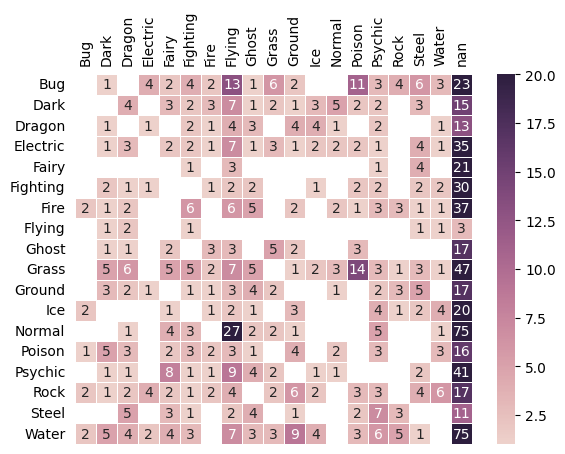

In [310]:
ax = sns.heatmap(type_distribution, vmin=1, vmax=20, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(left=False, top=False)

This is workable, however a pokemon having the type Water/Ice has the exact same properties as one having Ice/Water. As such, we will reorganize the numbers so that the first type is always the first in alphabetical order. We will also move the signel type pokemon to the diagonal, effectively putting a pure Water into Water/Water. The result will be a map with the upper right populated.

In [311]:
type_distribution_sorted = copy(type_distribution)
types = type_distribution.drop(columns=[np.nan]).columns

for i, type1 in enumerate(types):
    type_distribution_sorted.loc[type1, type1] = type_distribution_sorted[np.nan][type1]
    for j, type2 in enumerate(types):
        if i <= j:
            break
        type_distribution_sorted.loc[type2, type1] = np.nan_to_num(type_distribution_sorted.loc[type2, type1]) + np.nan_to_num(type_distribution_sorted.loc[type1, type2])
        if type_distribution_sorted.loc[type2, type1] == 0:
            type_distribution_sorted.loc[type2, type1] = np.nan
        type_distribution_sorted.loc[type1, type2] = np.nan

type_distribution_sorted.drop(columns=[np.nan], inplace=True)
type_distribution_sorted

type2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type1,,,,,,,,,,,,,,,,,,
Bug,23.0,1.0,NaN,4.0,2.0,4.0,4.0,13.0,1.0,6.0,2.0,2.0,NaN,12.0,3.0,6.0,6.0,5.0
Dark,NaN,15.0,5.0,1.0,3.0,4.0,4.0,8.0,2.0,7.0,4.0,3.0,5.0,7.0,3.0,1.0,3.0,5.0
Dragon,NaN,NaN,13.0,4.0,NaN,3.0,3.0,6.0,4.0,6.0,6.0,4.0,2.0,3.0,3.0,2.0,5.0,5.0
Electric,NaN,NaN,NaN,35.0,2.0,3.0,1.0,7.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,3.0
Fairy,NaN,NaN,NaN,NaN,21.0,1.0,NaN,3.0,2.0,5.0,NaN,1.0,4.0,2.0,9.0,2.0,7.0,4.0
Fighting,NaN,NaN,NaN,NaN,NaN,30.0,7.0,3.0,2.0,5.0,1.0,1.0,3.0,5.0,3.0,1.0,3.0,5.0
Fire,NaN,NaN,NaN,NaN,NaN,NaN,37.0,6.0,8.0,2.0,3.0,1.0,2.0,3.0,4.0,5.0,1.0,1.0
Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,7.0,3.0,2.0,27.0,3.0,9.0,4.0,3.0,8.0
Ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,10.0,6.0,1.0,2.0,4.0,4.0,NaN,4.0,3.0


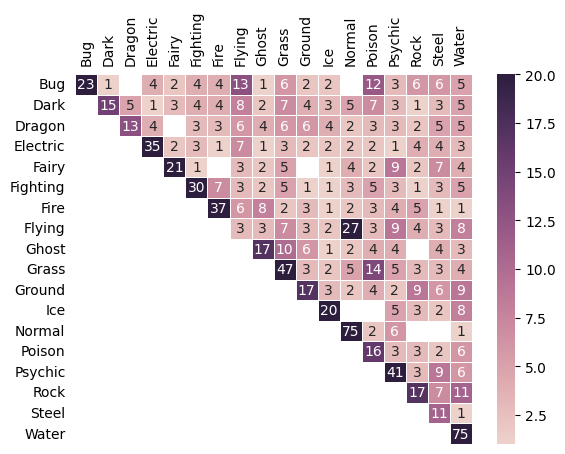

In [312]:
ax = sns.heatmap(type_distribution_sorted, vmin=1, vmax=20, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(left=False, top=False)

In [313]:
df_unique_types.loc[~df_unique_types['type2'].isna(), 'type_tuple'].value_counts().head(10)

type_tuple
(Flying, Normal)     27
(Grass, Poison)      14
(Bug, Flying)        13
(Bug, Poison)        12
(Rock, Water)        11
(Ghost, Grass)       10
(Ground, Rock)        9
(Fairy, Psychic)      9
(Flying, Psychic)     9
(Ground, Water)       9
Name: count, dtype: int64

## Type resistances and weaknesses

The table below display the attack type as a row and the defending type in the column.

Since we work with rows, we'll need to transpose it.

In [314]:
df_types

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


In [315]:
df_types.T

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
Fire,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
Water,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Grass,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
Ice,1.0,2.0,1.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
Fighting,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,1.0,2.0
Poison,1.0,1.0,1.0,1.0,0.5,1.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5
Ground,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0
Flying,1.0,1.0,1.0,2.0,0.5,2.0,0.5,1.0,0.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0


In [389]:
dual_type_matrix = pd.DataFrame(columns=df_types.columns)
dual_type_matrix.insert(loc=0, column='type_tuple', value=np.nan)
# dual_type_matrix.insert(loc=1, column='nb_pokemon', value=np.nan)

for i, type1 in enumerate(df_types.columns):
    for j, type2 in enumerate(df_types.columns):
        if type1 > type2:
            continue
        if type1 == type2:
            resistance = df_types[type1]
        else:
            resistance = df_types[type1] * df_types[type2]
        tuple = f'({type1}, {type2})'
        resistance.loc['type_tuple'] = tuple
        # resistance.loc['nb_pokemon'] = df_unique_types[ df_unique_types['type_tuple'] == tuple ]['name'].count()
        dual_type_matrix.loc[ len(dual_type_matrix.index) ] = resistance
dual_type_matrix

,type_tuple,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,"(Normal, Normal)",1,1,1,1,1,1,2,1,1,1,1,1,1,0,1,1,1,1
1,"(Normal, Water)",1.0,0.5,0.5,2.0,2.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0
2,"(Normal, Poison)",1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,2.0,1.0,2.0,0.5,1.0,0.0,1.0,1.0,1.0,0.5
3,"(Normal, Psychic)",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0,0.0,1.0,2.0,1.0,1.0
4,"(Normal, Rock)",0.5,0.5,2.0,1.0,2.0,1.0,4.0,0.5,2.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"(Fairy, Psychic)",1.0,1.0,1.0,1.0,1.0,1.0,0.25,2.0,1.0,1.0,0.5,1.0,1.0,2.0,0.0,1.0,2.0,1.0
167,"(Fairy, Rock)",0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,1.0,0.0,0.5,4.0,1.0
168,"(Fairy, Ghost)",0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.25,1.0,2.0,0.0,1.0,2.0,1.0
169,"(Fairy, Steel)",0.5,2.0,1.0,1.0,0.5,0.5,1.0,0.0,2.0,0.5,0.5,0.25,0.5,1.0,0.0,0.5,1.0,0.5


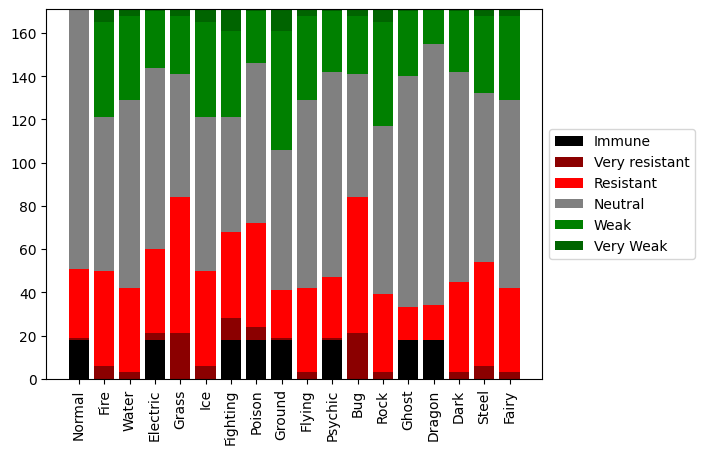

In [386]:
resistances = {
    0.0:    'Immune',
    0.25:   'Very resistant',
    0.5:    'Resistant',
    1.0:    'Neutral',
    2.0:    'Weak',
    4.0:    'Very Weak',
}
colors = [
    'black',
    'darkred',
    'red',
    'grey',
    'green',
    'darkgreen',
]

matrix = {}

for key, name in resistances.items():
    matrix[name] = []
    for type in df_types.columns:
        count = dual_type_matrix[type].value_counts(ascending=False)
        if key in count:
            matrix[name].append(int(count[key]))
        else:
            matrix[name].append(0)

ground = [0] * 18
for color, values in zip(colors, matrix.values()):
    plt.bar(x=df_types.columns, height=values, bottom=ground, color=color)
    ground = [a + b for a,b in zip(ground, values)]            
    
plt.legend(resistances.values(), loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=90)
plt.show()

In [395]:
df_resistances = copy(df_unique_types)

df_resistances = df_resistances.merge(dual_type_matrix, on='type_tuple')

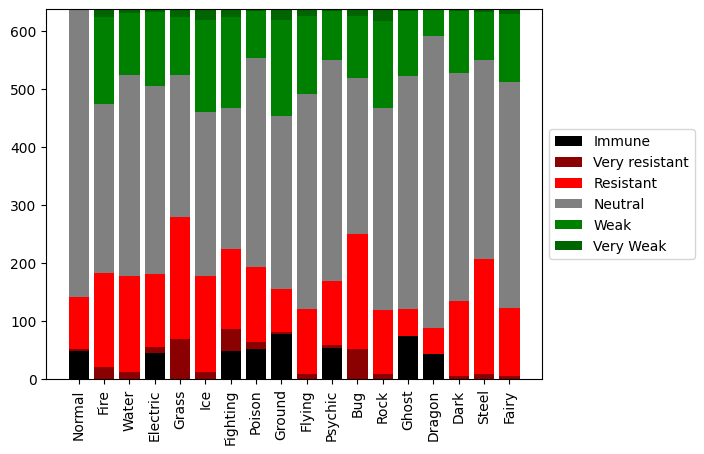

In [397]:
resistances = {
    0.0:    'Immune',
    0.25:   'Very resistant',
    0.5:    'Resistant',
    1.0:    'Neutral',
    2.0:    'Weak',
    4.0:    'Very Weak',
}
colors = [
    'black',
    'darkred',
    'red',
    'grey',
    'green',
    'darkgreen',
]

matrix = {}

for key, name in resistances.items():
    matrix[name] = []
    for type in df_types.columns:
        count = df_resistances.loc[ df_resistances['evo_is_final'] == 1, type].value_counts(ascending=False)
        if key in count:
            matrix[name].append(int(count[key]))
        else:
            matrix[name].append(0)

ground = [0] * 18
for color, values in zip(colors, matrix.values()):
    plt.bar(x=df_types.columns, height=values, bottom=ground, color=color)
    ground = [a + b for a,b in zip(ground, values)]            
    
plt.legend(resistances.values(), loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=90)
plt.show()